<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment4(Q2)_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
---


In [17]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
from pandas.core.generic import T

---

In [2]:
usa = pd.read_csv("/content/USA_Housing.csv")

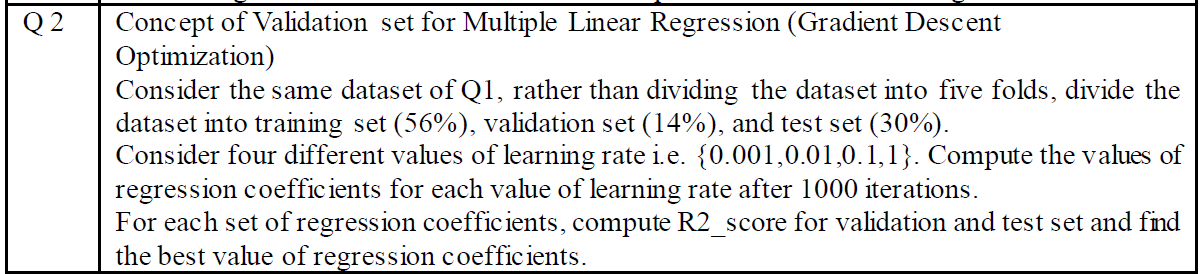

---

In [3]:
usa = pd.read_csv("/content/USA_Housing.csv")

In [5]:
features = usa.iloc[:, : - 1].values
print(features)

[[7.95454586e+04 5.68286132e+00 7.00918814e+00 4.09000000e+00
  2.30868005e+04]
 [7.92486424e+04 6.00289981e+00 6.73082102e+00 3.09000000e+00
  4.01730722e+04]
 [6.12870672e+04 5.86588984e+00 8.51272743e+00 5.13000000e+00
  3.68821594e+04]
 ...
 [6.33906869e+04 7.25059062e+00 4.80508098e+00 2.13000000e+00
  3.32661455e+04]
 [6.80013312e+04 5.53438842e+00 7.13014386e+00 5.44000000e+00
  4.26256202e+04]
 [6.55105818e+04 5.99230531e+00 6.79233610e+00 4.07000000e+00
  4.65012838e+04]]


In [6]:
output_var = usa.iloc[:, -1].values
print(output_var)

[1059033.558 1505890.915 1058987.988 ... 1030729.583 1198656.872
 1298950.48 ]


In [9]:
scaler = StandardScaler()
scaler.fit(features)
scaled_data = scaler.transform(features)
features = scaled_data
print(features)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [10]:
features_df = pd.DataFrame(features, columns = ['income', 'age', 'rooms', 'bedrooms', 'pop'])
output_df = pd.DataFrame(output_var, columns = ['cost'])
display(features_df)
display(output_df)

,income,age,rooms,bedrooms,pop
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387
...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116


,cost
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [11]:
concat = pd.concat([features_df, output_df], axis=1)
display(concat)

,income,age,rooms,bedrooms,pop,cost
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,1.059034e+06
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,1.505891e+06
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,1.058988e+06
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,1.260617e+06
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,6.309435e+05
...,...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732,1.060194e+06
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747,1.482618e+06
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937,1.030730e+06
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116,1.198657e+06


In [13]:
scores = []
rmse_list = []
lrmodel = LinearRegression()
x = features_df
y = output_df
index = []

In [14]:
x = np.array(x)
y = np.array(y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 8)

In [16]:
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[ 0.69829314  0.73065683  1.57726316  1.23067501 -1.96926166]
 [ 0.31063022  0.3155767   1.13260393  0.1934095  -1.72599456]
 [-0.41421423  0.38662171  0.54552605 -0.4224669  -1.62477589]
 ...
 [-0.75247383 -0.31377543  1.38659849  0.84980408  1.35123939]
 [ 1.87417067 -1.08735222 -0.40084216  0.01512949  2.32743782]
 [-0.35246973 -0.38817475  0.16624127 -0.56022872  0.01805591]]
[[1361841.952 ]
 [ 995849.7751]
 [1031121.814 ]
 ...
 [1247002.164 ]
 [1900999.546 ]
 [1227167.408 ]]
(2800, 5)
(2800, 1)


In [18]:
def fit_linear_regression(x, y, learning_rate):
  regression = np.c_[x, np.ones(len(x))]
  weights = np.ones((6,2800))
  max_error = 0.0
  for i in range(0, 1000):
      y_pred = regression @ weights.T
      partial = regression.T @ (y - y_pred)
      norma = np.sum(np.sum(np.sqrt(np.square(partial))))
      if(norma > max_error):
        max_error = norma
      weights = weights.T + (learning_rate * partial)

  return weights

In [ ]:
wei = fit_linear_regression(x_train, y_train, 0.001)

In [20]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
    return w, b, cost_list

In [21]:
def predict(w, x):
  return w[:-1] @ np.array(x).T + w[-1]

In [22]:
w = np.zeros((1, 2800))

In [23]:
w = np.transpose(x)

In [24]:
w, b, c= GradientDescent(x_train, y_train, np.zeros((5, 2800)), 0, 0.001,epochs=1)

In [25]:
def predict(X, w, b):
    return X.dot(w) + b



y_pred = predict(x_test, w, b)

In [26]:
print(y_pred[1])

[3451923.00337755 3451923.00337755 3451923.00337755 ... 3451923.00337755
 3451923.00337755 3451923.00337755]


In [27]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2


r2score(y_pred, y_test)

-119196.22898835476